работа с различными моделями

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


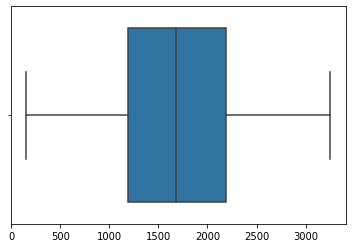

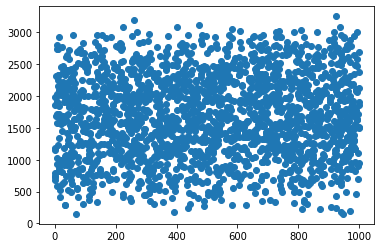

In [2]:
import numpy as np
import seaborn as sns
import numpy as np
%pylab inline
np.random.seed(3)
x1 = []
y1 = []
for i in range(1,5):
    x1.append(np.random.randint(low=0, high=1000, size=2000))
    X = np.array(x1,int)
for j in range(0, 2000):
    y1.append(X[0][j]%10+X[1][j]*2+X[2][j]/3+X[3][j]+4)
y = np.array(y1,int)
sns.boxplot(y)
plt.show()
plt.scatter(x=X[0], y=y)
plt.show()

попробуем разные модели

In [3]:
X_train = X.transpose()
Y_train = y
X_train = X_train.astype("float32")
Y_train = Y_train.astype("float32")
X_train.shape, Y_train.shape

((2000, 4), (2000,))

In [4]:
%%time
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

CPU times: user 23.5 s, sys: 9.94 s, total: 33.5 s
Wall time: 18.4 s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


13.2

In [5]:
%%time
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

CPU times: user 29 s, sys: 103 ms, total: 29.1 s
Wall time: 29 s


3.15

In [6]:
%%time
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

CPU times: user 63.8 ms, sys: 590 µs, total: 64.4 ms
Wall time: 63.6 ms


25.7

In [7]:
%%time
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

CPU times: user 178 ms, sys: 7.42 ms, total: 185 ms
Wall time: 184 ms


65.5

In [8]:
%%time
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

CPU times: user 1.38 s, sys: 38.5 ms, total: 1.41 s
Wall time: 1.39 s


0.35

In [9]:
%%time
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

CPU times: user 1.41 s, sys: 92.3 ms, total: 1.5 s
Wall time: 1.39 s


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.0

In [10]:
%%time
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

CPU times: user 3.49 s, sys: 80.1 ms, total: 3.57 s
Wall time: 3.45 s


0.15

In [11]:
%%time
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

CPU times: user 373 ms, sys: 92.2 ms, total: 465 ms
Wall time: 364 ms


100.0

In [12]:
%%time
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

CPU times: user 19.1 s, sys: 1.39 s, total: 20.5 s
Wall time: 20.5 s


100.0

In [13]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
sorted_model=models.sort_values(by='Score', ascending=False)
sorted_model

,Model,Score
3,Random Forest,100.00
8,Decision Tree,100.00
4,Naive Bayes,65.50
1,KNN,25.70
2,Logistic Regression,13.20
0,Support Vector Machines,3.15
5,Perceptron,0.35
6,Stochastic Gradient Decent,0.15
7,Linear SVC,0.00


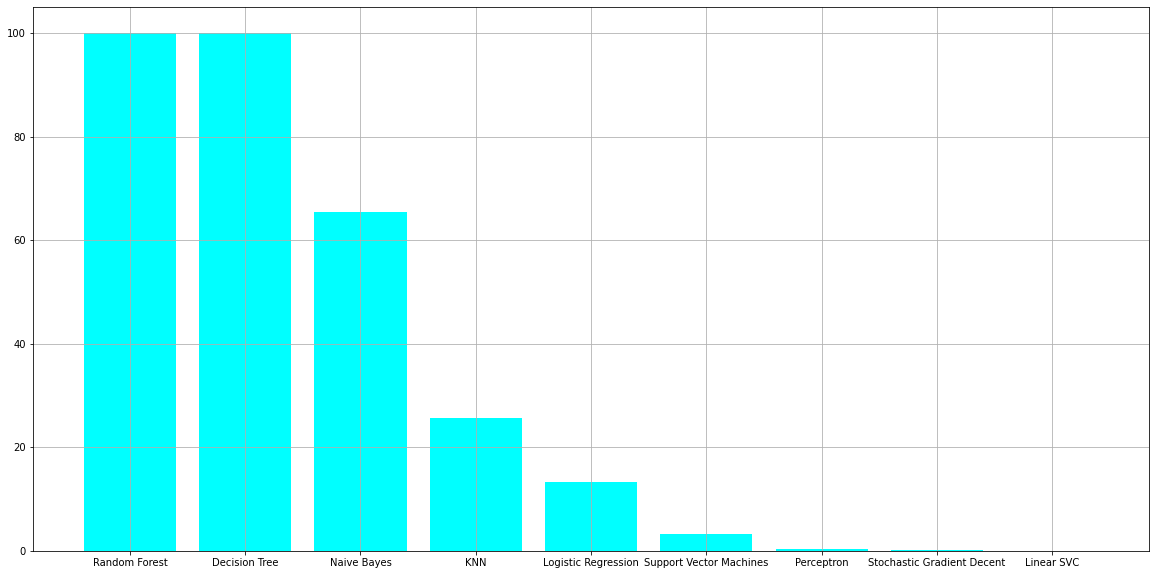

In [14]:
plt.figure(figsize=(20,10))
fig = plt.bar(sorted_model['Model'], sorted_model['Score'],color='aqua')
plt.grid()
plt.show()